In [50]:
import scipy.linalg as la

def flatten_tensor_list(tensors):
    flattened = []
    for tensor in tensors:
        # Changed view to reshape
        flattened.append(tensor.reshape(-1))
    return torch.cat(flattened, 0)

def get_eigen(H_bmm, matrix=None, maxIter=10., tol=1e-3, method='lanczos'):
    """
    compute the top eigenvalues of model parameters and
    the corresponding eigenvectors.
    """
    # change the model to evaluation mode, otherwise the batch Normalization Layer will change.
    # If you call this function during training, remember to change the mode back to training mode.
    params = None
    if params:
        q = flatten_tensor_list([torch.randn(p.size(), device=p.device) for p in params])
    else:
        q = torch.randn(matrix.size()[0])

    q = q / torch.norm(q)

    eigenvalue = None

    if method == 'power':
        # Power iteration
        for _ in range(maxIter):
            Hv = H_bmm(q)
            eigenvalue_tmp = torch.dot(Hv, q)
            Hv_norm = torch.norm(Hv)
            if Hv_norm == 0:
                break
            q = Hv / Hv_norm
            if eigenvalue is None:
                eigenvalue = eigenvalue_tmp
            else:
                if abs(eigenvalue - eigenvalue_tmp) / abs(eigenvalue) < tol:
                    return eigenvalue_tmp, q
                else:
                    eigenvalue = eigenvalue_tmp
        return eigenvalue, q

    elif method == 'lanczos':
        # Lanczos iteration
        b = 0
        if params:
            q_last = flatten_tensor_list([torch.zeros(p.size(), device=p.device) for p in params])
        else:
            q_last = torch.zeros(matrix.size()[0])
        q_s = [q_last]
        a_s = []
        b_s = []
        for _ in range(maxIter):
            Hv = H_bmm(q)
            a = torch.dot(Hv, q)
            Hv -= (b * q_last + a * q)
            q_last = q
            q_s.append(q_last)
            b = torch.norm(Hv)
            a_s.append(a)
            b_s.append(b)
            if b == 0:
                break
            q = Hv / b
        eigs, _ = la.eigh_tridiagonal(a_s, b_s[:-1])

        return eigs

In [51]:
import sys
!{sys.executable} -m pip install torch

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [23]:
import torch 
import numpy as np
from scipy.stats import ortho_group

In [61]:
mat = torch.rand((1000, 1000))*10
mat = mat.t() @ mat - 100 * torch.eye(mat.size()[0])

In [83]:
mat = ortho_group.rvs(dim=200)
mat = mat @ np.diag(np.arange(200)+1) @ mat.T
mat = torch.from_numpy(mat).float()
mat = mat - 100 * torch.eye(mat.size()[0])

In [91]:
max_eigen = torch.max(torch.symeig(mat)[0])
min_eigen = torch.min(torch.symeig(mat)[0])

In [92]:
errors_lan = []
errors_power = []
steps = [2**i for i in range(1, 8)]
for step in steps:
    errors_power.append(abs(min_eigen -
                            get_eigen(lambda x: mat @ x, matrix = mat,
                                  maxIter = step, method = 'power')[0]
                            )
                        )
    errors_lan.append(abs(min_eigen - 
                          get_eigen(lambda x: mat @ x, matrix = mat,
                                maxIter = step)[0]
                          )
                      )

In [88]:
get_eigen(lambda x: mat @ x, matrix = mat,
                                maxIter = step)[0]

-99.0

In [90]:
torch.symeig(mat)

torch.return_types.symeig(
eigenvalues=tensor([-9.89999618530273437500e+01, -9.79999847412109375000e+01,
        -9.69999694824218750000e+01, -9.59999694824218750000e+01,
        -9.49999694824218750000e+01, -9.39999923706054687500e+01,
        -9.29999618530273437500e+01, -9.20000000000000000000e+01,
        -9.09999923706054687500e+01, -8.99999923706054687500e+01,
        -8.90000000000000000000e+01, -8.79999923706054687500e+01,
        -8.69999694824218750000e+01, -8.60000076293945312500e+01,
        -8.50000000000000000000e+01, -8.39999771118164062500e+01,
        -8.30000152587890625000e+01, -8.20000686645507812500e+01,
        -8.09999923706054687500e+01, -7.99999847412109375000e+01,
        -7.89999923706054687500e+01, -7.80000000000000000000e+01,
        -7.70000000000000000000e+01, -7.59999847412109375000e+01,
        -7.50000076293945312500e+01, -7.39999923706054687500e+01,
        -7.30000076293945312500e+01, -7.20000000000000000000e+01,
        -7.10000076293945312500e+01, 

In [87]:
torch.symeig(mat)

torch.return_types.symeig(
eigenvalues=tensor([-9.89999618530273437500e+01, -9.79999847412109375000e+01,
        -9.69999694824218750000e+01, -9.59999694824218750000e+01,
        -9.49999694824218750000e+01, -9.39999923706054687500e+01,
        -9.29999618530273437500e+01, -9.20000000000000000000e+01,
        -9.09999923706054687500e+01, -8.99999923706054687500e+01,
        -8.90000000000000000000e+01, -8.79999923706054687500e+01,
        -8.69999694824218750000e+01, -8.60000076293945312500e+01,
        -8.50000000000000000000e+01, -8.39999771118164062500e+01,
        -8.30000152587890625000e+01, -8.20000686645507812500e+01,
        -8.09999923706054687500e+01, -7.99999847412109375000e+01,
        -7.89999923706054687500e+01, -7.80000000000000000000e+01,
        -7.70000000000000000000e+01, -7.59999847412109375000e+01,
        -7.50000076293945312500e+01, -7.39999923706054687500e+01,
        -7.30000076293945312500e+01, -7.20000000000000000000e+01,
        -7.10000076293945312500e+01, 

In [85]:
get_eigen(lambda x: mat @ x, matrix = mat,
                                maxIter = step)

array([-99.        , -99.        , -98.        , -97.99998   ,
       -97.        , -96.99981   , -96.        , -95.58007   ,
       -95.        , -94.        , -93.        , -92.        ,
       -91.        , -90.        , -89.        , -87.99994   ,
       -86.999985  , -85.99874   , -84.7188    , -83.99191   ,
       -82.988785  , -81.052505  , -80.15399   , -79.25011   ,
       -78.219475  , -77.04425   , -75.13955   , -74.68771   ,
       -72.826454  , -70.27785   , -69.41555   , -67.78214   ,
       -65.93331   , -64.63144   , -63.053993  , -60.96007   ,
       -59.91805   , -57.768116  , -55.16791   , -52.965942  ,
       -51.15386   , -50.000248  , -47.660084  , -45.632984  ,
       -43.714855  , -41.280197  , -39.72326   , -37.92805   ,
       -34.12858   , -32.31681   , -30.180237  , -28.546173  ,
       -26.706741  , -24.15776   , -21.732246  , -19.707779  ,
       -16.692581  , -15.203056  , -13.074234  ,  -9.314659  ,
        -7.792671  ,  -5.8382034 ,  -4.1763    ,  -1.07

In [3]:
torch.randn((500, 500))

tensor([[-0.3833, -0.6096, -1.2551,  ..., -1.4292,  2.2396,  0.9875],
        [ 0.4110, -1.0750,  1.5191,  ..., -0.0844, -0.2742, -1.0629],
        [-0.1033, -0.9905, -1.8115,  ..., -0.2434,  0.1381,  0.9710],
        ...,
        [ 0.6070,  1.4428, -0.5422,  ...,  0.0165,  1.6769, -0.0142],
        [-0.2890, -0.2881, -1.1181,  ..., -1.5913,  0.1424, -0.1516],
        [-0.7981, -1.5811,  2.0391,  ..., -0.8666,  0.8961,  0.3590]])

In [4]:
torch.set_printoptions(precision=20)   

In [5]:
eigs_all = get_eigen(lambda x: mat @ x,
                     matrix = mat, maxIter=100)

In [6]:
eigs_all = get_eigen(lambda x: mat @ x - 3866.7346 * torch.eye(mat.size()[0]) @ x,
                     matrix = mat, maxIter=100)

In [7]:
eigs_all[-1]

12.110263

In [8]:
eigs_all[0] + 3866.7346

-99.75758750000023

In [9]:
max(torch.symeig(mat)[0])

tensor(3878.83569335937500000000)

In [18]:
errors_lan, steps

([tensor(376.42608642578125000000),
  tensor(114.97798919677734375000),
  tensor(35.27083587646484375000),
  tensor(9.41719055175781250000),
  tensor(1.90515899658203125000),
  tensor(0.55318450927734375000),
  tensor(0.15904235839843750000)],
 [2, 4, 8, 16, 32, 64, 128])

Text(0.5, 1.0, 'lanczos')

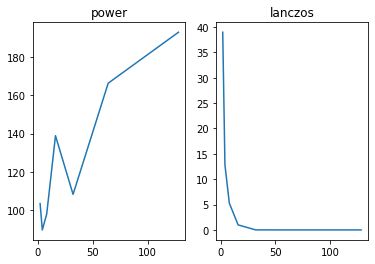

In [93]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.subplot(1, 2, 1)
plt.plot(steps, errors_power)
plt.title('power')

plt.subplot(1, 2, 2)
plt.plot(steps, errors_lan)
plt.title('lanczos')

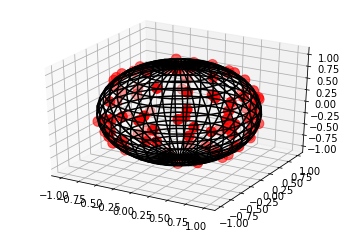

In [6]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

phi = torch.linspace(0, np.pi, 20)
theta = torch.linspace(0, 2 * np.pi, 40)
x = torch.ger(torch.sin(theta), torch.cos(phi))
y = torch.ger(torch.sin(theta), torch.sin(phi))
z = torch.ger(torch.cos(theta), torch.ones_like(phi))

xi, yi, zi = sample_spherical(100)

fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'})
ax.plot_wireframe(x, y, z, color='k', rstride=1, cstride=1)
ax.scatter(xi, yi, zi, s=100, c='r', zorder=10)
